In [1]:
%matplotlib inline

In [2]:
%%javascript
//IPython.OutputArea.auto_scroll_threshold = 9999;

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pylab as pl
import random
import matplotlib 
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from sklearn import tree 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Examples
 
## Example 1 -  Linear Separation

### Introduction to SVM code - Linear SVM
Linear kernel is defined as K(u,v) = u.v (dot product)
Parameter - C.
Construct Hyperplane.


In [4]:
def plot_learning_curve(estimator,title, X, y, ylim=None, cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    print('mean CV train score at largest training dataset',train_scores_mean[-1],'mean CV validation score',test_scores_mean[-1])
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="CV Training accuracy score (not error)")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="CV Validation accuracy score(not error)")

    plt.legend(loc="best")
    plt.show()
#    plt.savefig(outfile,bbox_inches='tight')
    return (plt,train_sizes, train_scores, test_scores)





accuracy 0.9965
weights: 
[[-4.62410827 -6.70617505]]
 
Intercept: 
[1.73467724]
 
 
Hyperplane Equation ω^[T] x+ b = 0
 
Equation - w[0]*x+w[1]*y+intercept=0
 
So w[1]*y=-w[0]*x-intercept
 
Now divide both sides by w[1], and you get
 
y=-(w[0]/w[1])*x-intercept/w[1].
 
Margin compute 0.12276163001763622
mean CV train score at largest training dataset 1.0 mean CV validation score 1.0


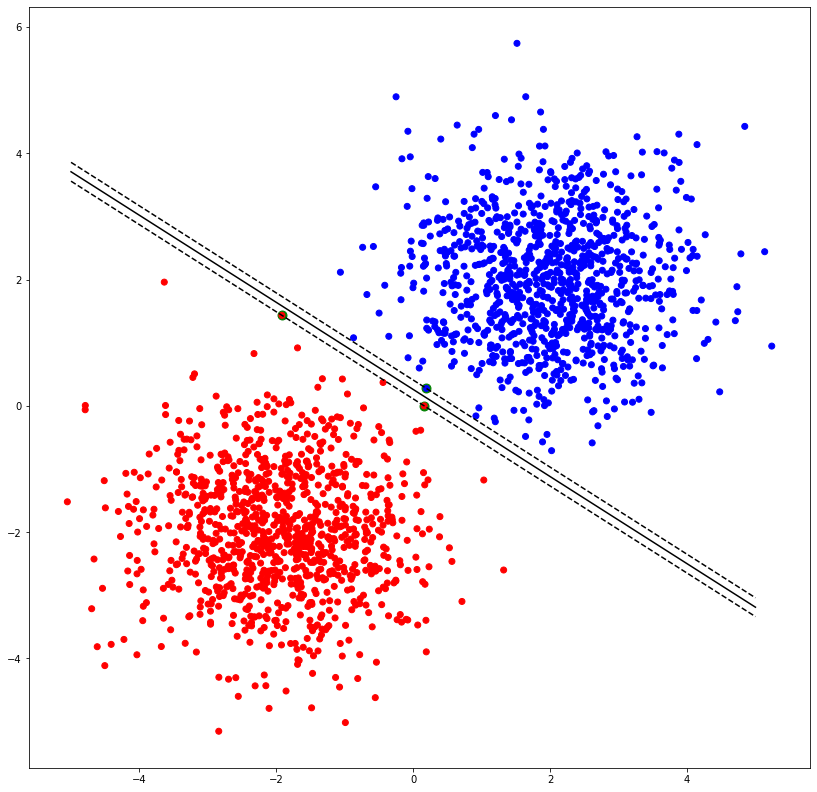

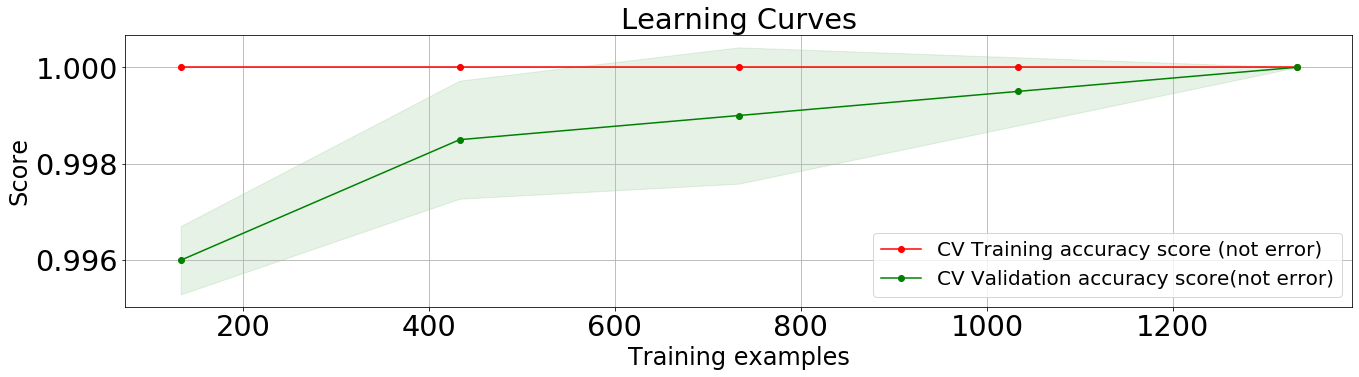

In [5]:
from sklearn import svm

# Source:  http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py


np.random.seed(1)
X = np.r_[np.random.randn(1000, 2) - [2, 2], np.random.randn(1000, 2) + [2, 2]]
Y = ['r'] * 1000 + ['b'] * 1000

np.random.seed(20)
X_test = np.r_[np.random.randn(1000, 2) - [2, 2], np.random.randn(1000, 2) + [2, 2]]
Y_test = ['r'] * 1000 + ['b'] * 1000

# define the SVM model
clf = svm.SVC(kernel='linear',C=1000)

# Learning -  Train the SVM model
clf.fit(X, Y)

# Predict using the model
y_predict=clf.predict(X_test)
print('accuracy',accuracy_score(Y_test,y_predict))


print('weights: ')
print(clf.coef_)
print(' ')
print('Intercept: ')
print(clf.intercept_)
print(' ')
print(' ')
print('Hyperplane Equation','ω^[T] x+ b = 0')
print(' ')
print('Equation - w[0]*x+w[1]*y+intercept=0')
print(' ')
print('So w[1]*y=-w[0]*x-intercept')
print(' ')
print('Now divide both sides by w[1], and you get')
print(' ')
print('y=-(w[0]/w[1])*x-intercept/w[1].')
print(' ')
# get the separating hyperplane
w = clf.coef_[0]
xx = np.linspace(-5, 5)
yy = (-w[0] / w[1]) * xx - (clf.intercept_[0]) / w[1]


margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print('Margin compute',margin)
# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]

Intercept_line_through_SV= (b[1] - (-w[0] / w[1]) * b[0])
yy_down = (-w[0] / w[1]) * xx +  Intercept_line_through_SV

b = clf.support_vectors_[-1]
Intercept_line_through_SV= (b[1] - (-w[0] / w[1]) * b[0])
yy_up = (-w[0] / w[1]) * xx + Intercept_line_through_SV

a = -w[0] / w[1]
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
# plot the line, the points, and the nearest vectors to the plane

plt.figure(figsize=(14,14))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, facecolors='green')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)



X_train=X 
y_t=Y

      
from sklearn.utils import shuffle
X_train,y_t = shuffle(X_train,y_t)
      
from sklearn.model_selection import learning_curve
title = "Learning Curves"
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (22, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
plt1,train_sizes, train_scores, test_scores=plot_learning_curve(clf,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
#plt.axis('tight')
#plt.show()

Performance on unseen test dataset
accuracy 0.9965


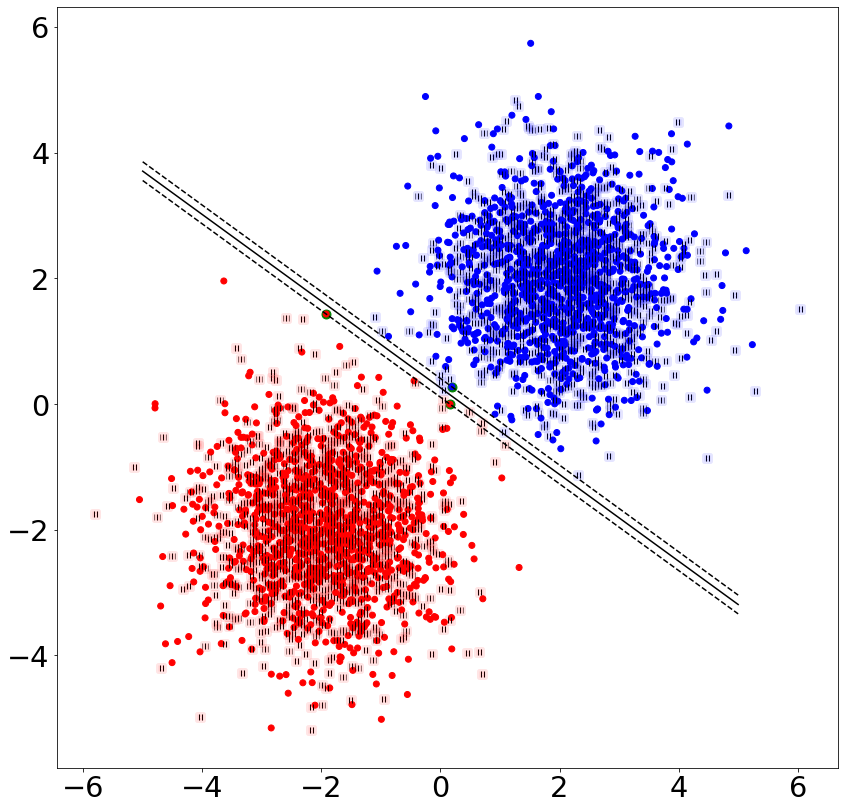

In [6]:
print ('Performance on unseen test dataset')
print('accuracy',accuracy_score(Y_test,y_predict))
plt.figure(figsize=(14,14))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='green')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predict, linewidth=5,hatch='||||',marker='s',alpha=0.1)

## Example 2 -  Linear Separation

###  Linear SVM - Try changing C value below

- Observe the influence on Margin

### Influence of parameter C 
C= 1e-05
C= 0.001
C= 0.01
C= 0.1
C= 1
C= 100



For C = 0.1
weights are: 
[[-0.9608659 -0.9910635]]
 
Margin 0.7244341703541748
Total number of support vectors 30
mean CV train score at largest training dataset 0.9992498124531132 mean CV validation score 1.0


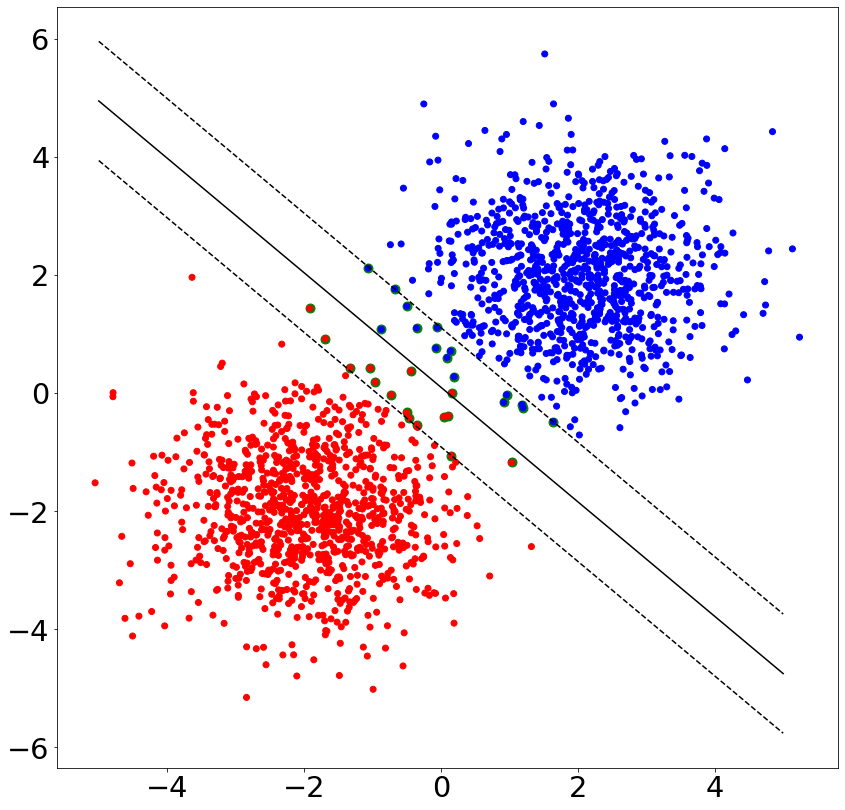

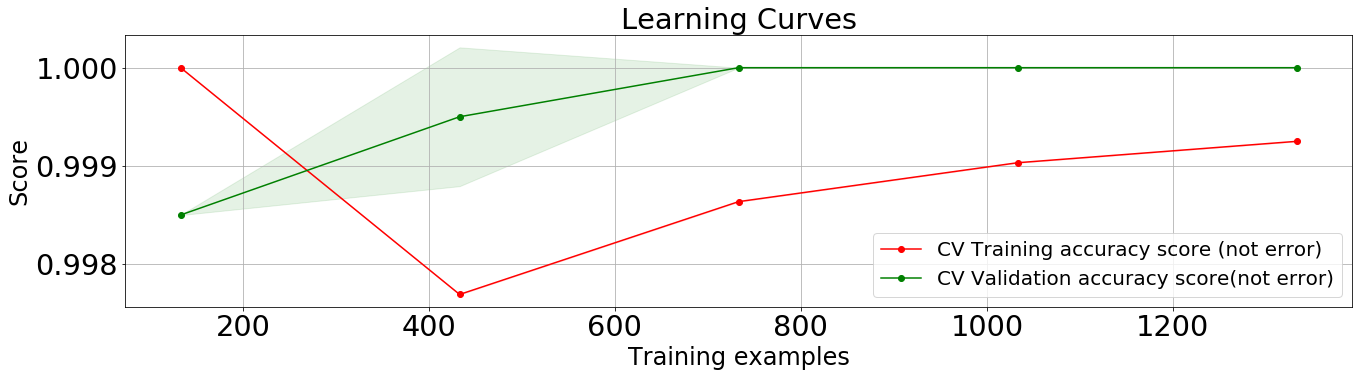

accuracy  0.996


In [7]:
from sklearn import svm
np.random.seed(1)
X = np.r_[np.random.randn(1000, 2) - [2, 2], np.random.randn(1000, 2) + [2, 2]]
Y = ['r'] * 1000 + ['b'] * 1000

np.random.seed(2)
X_test = np.r_[np.random.randn(1000, 2) - [2, 2], np.random.randn(1000, 2) + [2, 2]]
Y_test = ['r'] * 1000 + ['b'] * 1000

# define the SVM model
C=1e-01
clf = svm.SVC(kernel='linear',C=C)

# Learning -  Train the SVM model
clf.fit(X, Y)

# Predict using the model
print ('For C =', C)
print('weights are: ')
print(clf.coef_)
print(' ')
w = clf.coef_[0]
xx = np.linspace(-5, 5)
yy = (-w[0] / w[1]) * xx - (clf.intercept_[0]) / w[1]


margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print('Margin',margin)
print ('Total number of support vectors', len(clf.support_vectors_))
# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]

Intercept_line_through_SV= (b[1] - (-w[0] / w[1]) * b[0])
yy_down = (-w[0] / w[1]) * xx +  Intercept_line_through_SV

b = clf.support_vectors_[-1]
Intercept_line_through_SV= (b[1] - (-w[0] / w[1]) * b[0])
yy_up = (-w[0] / w[1]) * xx + Intercept_line_through_SV

a = -w[0] / w[1]
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
# plot the line, the points, and the nearest vectors to the plane

plt.figure(figsize=(14,14))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, facecolors='green')

         
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

X_train=X 
y_t=Y

from sklearn.utils import shuffle
X_train,y_t = shuffle(X_train,y_t)
from sklearn.model_selection import learning_curve
title = "Learning Curves"
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (22, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
plt1,train_sizes, train_scores, test_scores=plot_learning_curve(clf,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)

y_predict=clf.predict(X_test)
print('accuracy ',accuracy_score(Y_test,y_predict))

print ('Performance on unseen test dataset')
print('accuracy',accuracy_score(Y_test,y_predict))
plt.figure(figsize=(14,14))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, facecolors='green')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predict, linewidth='5',hatch='||||',marker='s',alpha=0.1)

## Example 3 -    Non-Linear Kernel RBF SVM 

- Linear Kernel Versus Non Linear Kernel


In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data = np.loadtxt('./data/microchip.csv', delimiter=",")
X = data[:,:2]
Y = data[:,2]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

print ('Check for skewness/balanced dataset')
y1c=[1 if 0<value else 0 for value in Y]
print('percent of class 1', y1c.count(1)/len(y1c)*100)

X=X_train
Y=Y_train

y1ctest=[1 if 0<value else 0 for value in Y_test]
print('TEST CASE - percent of class 1', y1ctest.count(1)/len(y1ctest)*100)

y1ctest=[1 if 0<value else 0 for value in Y_train]
print('TRAIN CASE - percent of class 1', y1ctest.count(1)/len(y1ctest)*100)

Check for skewness/balanced dataset
percent of class 1 49.152542372881356
TEST CASE - percent of class 1 47.22222222222222
TRAIN CASE - percent of class 1 50.0


In [9]:
def prettyPicture(clf, X_test, y_test,index):
    #x_min = 0.0; x_max = 1.0
    #y_min = 0.0; y_max = 1.0
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig=plt.figure(figsize=(14,14))
    ax = fig.add_subplot(111)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z)#, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "r", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "b", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    score = clf.score(X_test, y_test)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=25, horizontalalignment='right',color='green')
    plt.show()
#    flaga = 'decisionboundarylinear %s' % str(index)
#    print(flag)
#    plt.savefig(flaga + '.png',box_inches='tight')
       


CLASSIFY MICROCHIP - NON-LINEAR DATASET
 
COMPARE DECISION BOUNDARY AND ACCURACY SCORE - LINEAR VS RBF KERNEL
RBF KERNEL


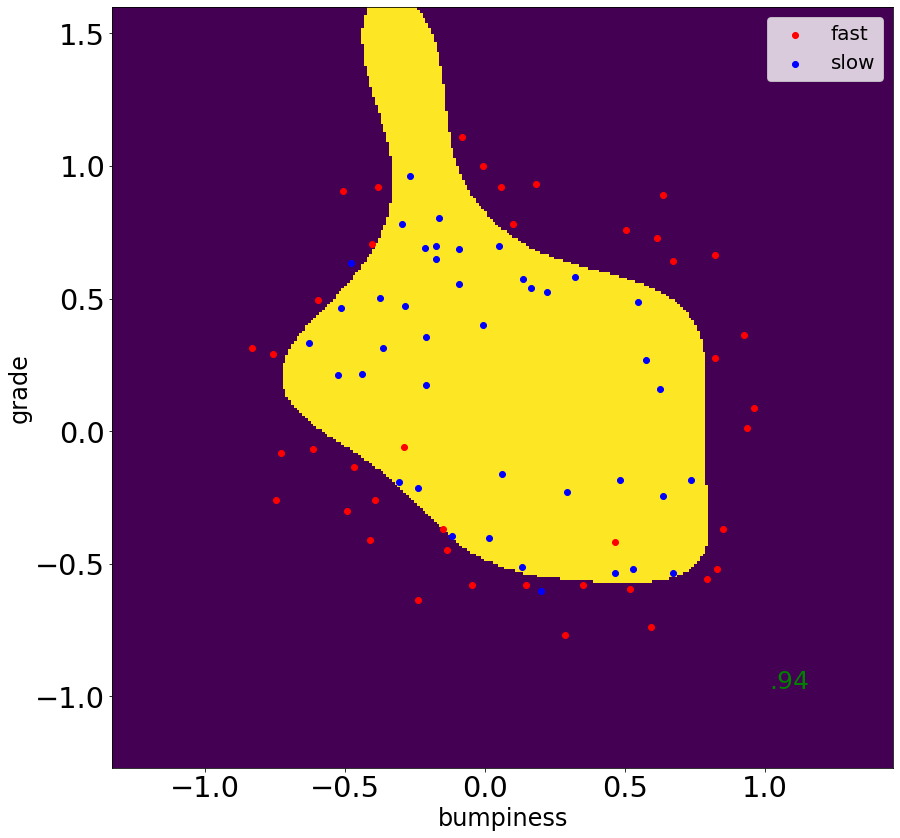

LINEAR KERNEL


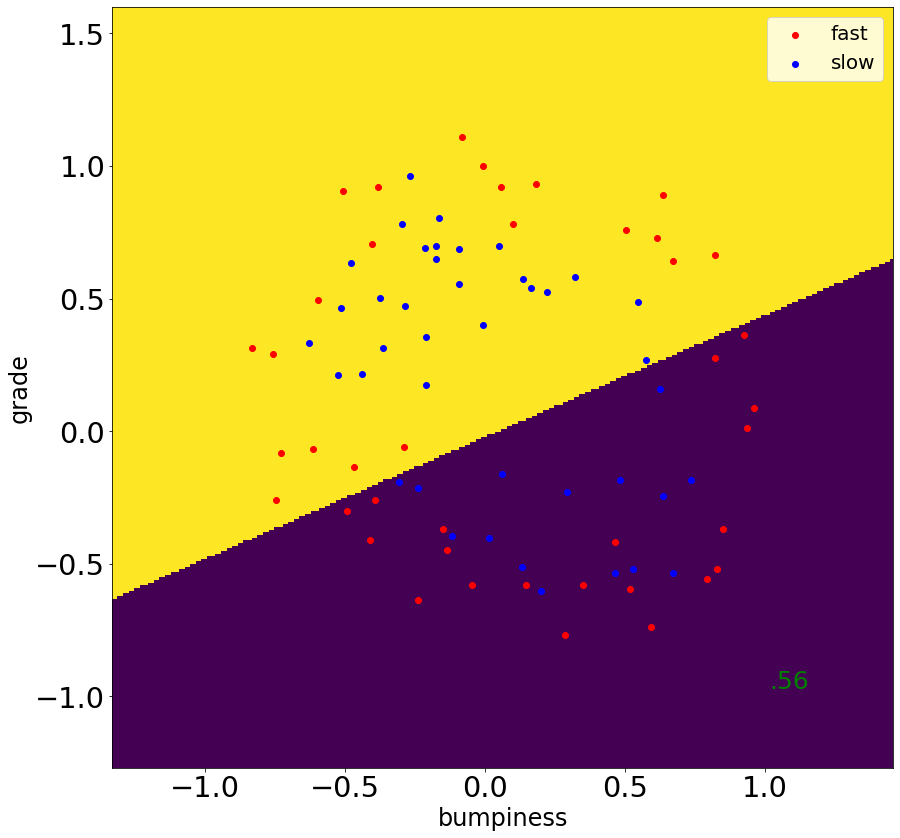

In [10]:
from sklearn import datasets, svm, pipeline
print ('CLASSIFY MICROCHIP - NON-LINEAR DATASET')
print (' ')
print ('COMPARE DECISION BOUNDARY AND ACCURACY SCORE - LINEAR VS RBF KERNEL')
#input("Press Enter to continue...")
print ('RBF KERNEL')
C=1000
clf=svm.SVC(kernel='rbf',C=1000, gamma=1.4)
clf.fit(X,Y)
prettyPicture(clf, X, Y,C);
y_predict=clf.predict(X_test)
accuracy_score(Y_test,y_predict)

X_train = data[:,:2]
y_t= data[:,2]



from sklearn.utils import shuffle
X_train,y_t = shuffle(X_train,y_t)
from sklearn.model_selection import learning_curve
title = "Learning Curves"
#plt1,train_sizes, train_scores, test_scores=plot_learning_curve(clf,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)

#input("Press Enter to continue...")
print ('LINEAR KERNEL')
C=1000
clf=svm.SVC(kernel='linear',C=1000)
clf.fit(X,Y)
prettyPicture(clf, X, Y,C);
y_predict=clf.predict(X_test)
accuracy_score(Y_test,y_predict)
from sklearn.utils import shuffle
X_train,y_t = shuffle(X_train,y_t)
from sklearn.model_selection import learning_curve
title = "Learning Curves"
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (22, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
#plt1,train_sizes, train_scores, test_scores=plot_learning_curve(clf,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)

## REFERENCES
http://cs229.stanford.edu/notes/cs229-notes3.pdf
https://stats.stackexchange.com/questions/23391/how-does-a-support-vector-machine-svm-work
https://dscm.quora.com/The-Kernel-Trick
http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications
https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights
http://docplayer.net/53199752-Data-classification-using-support-vector-machine-svm-a-simplified-approach.html
http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology
http://jonchar.net/notebooks/SVM/
